In [1]:
import mglearn
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

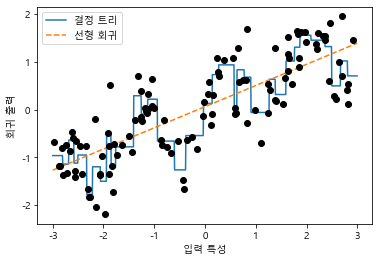

In [2]:
x, y= mglearn.datasets.make_wave(n_samples= 120)
line= np.linspace(-3, 3, 1000, endpoint= False).reshape(-1, 1)

reg= DecisionTreeRegressor(min_samples_leaf= 3).fit(x, y)
plt.plot(line, reg.predict(line), label= '결정 트리')

reg= LinearRegression().fit(x, y)
plt.plot(line, reg.predict(line), '--', label= '선형 회귀')

plt.plot(x[:, 0], y, 'o', c= 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc= 'best')

In [3]:
from sklearn.preprocessing import KBinsDiscretizer 

In [4]:
kb= KBinsDiscretizer(n_bins= 10, strategy= 'uniform').fit(x)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [5]:
x_binned= kb.transform(x)
x_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [6]:
print(x[:10])
print(x_binned.toarray()[:10])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [7]:
kb= KBinsDiscretizer(n_bins= 10, strategy= 'uniform', encode= 'onehot-dense').fit(x)
x_binned= kb.transform(x)

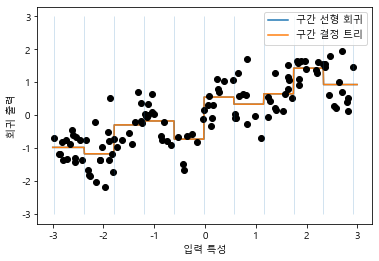

In [8]:
line_binned= kb.transform(line)

reg= LinearRegression().fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), label= '구간 선형 회귀')

reg= DecisionTreeRegressor(min_samples_split= 3).fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), label= '구간 결정 트리')

plt.plot(x[:, 0], y, 'o', c= 'k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth= 1, alpha= .2)
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc= 'best')

### 상호작용과 다항식

(120, 11)


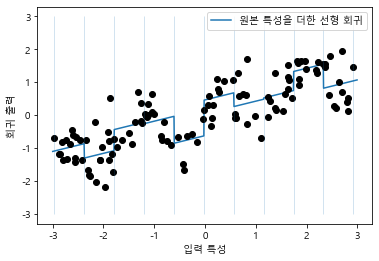

In [9]:
x_combined= np.hstack([x, x_binned])
print(x_combined.shape)

reg= LinearRegression().fit(x_combined, y)

line_combined= np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label= '원본 특성을 더한 선형 회귀')
plt.plot(x[:, 0], y, 'o', c= 'k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth= 1, alpha= .2)
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc= 'best')

In [10]:
x_product= np.hstack([x_binned, x*x_binned])
print(x_product.shape)

(120, 20)


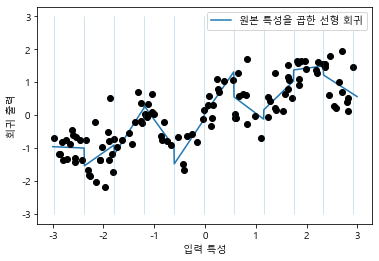

In [11]:
reg= LinearRegression().fit(x_product, y)

line_product= np.hstack([line_binned, line *line_binned])
plt.plot(line, reg.predict(line_product), label= '원본 특성을 곱한 선형 회귀')
plt.plot(x[:, 0], y, 'o', c= 'k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth= 1, alpha= .2)
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc= 'best')

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly= PolynomialFeatures(degree= 10, include_bias= False).fit(x)
x_poly= poly.transform(x)

In [14]:
print('x_poly.shape: ',x_poly.shape)

x_poly.shape:  (120, 10)


In [15]:
print('x의 원소: \n', x[:5])
print('x_poly의 원소: \n', x_poly[:5])

x의 원소: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
x_poly의 원소: 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [16]:
print('향 이름: \n', poly.get_feature_names_out())

향 이름: 
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


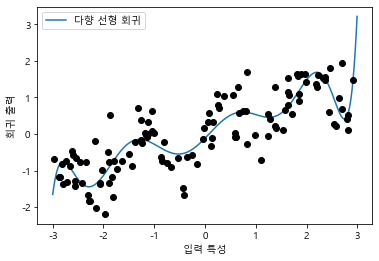

In [17]:
reg= LinearRegression().fit(x_poly, y)

line_poly= poly.transform(line)
plt.plot(line, reg.predict(line_poly), label= '다향 선형 회귀')
plt.plot(x[:, 0], y, 'o', c= 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc= 'best')

In [18]:
from sklearn.svm import SVR

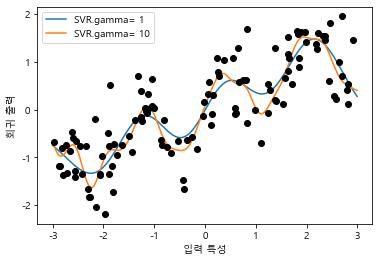

In [19]:
for gamma in [1, 10]:
    svr= SVR(gamma= gamma).fit(x, y)
    plt.plot(line, svr.predict(line), label= 'SVR.gamma= {}'.format(gamma))
    
plt.plot(x[:, 0], y, 'o', c= 'k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc= 'best')

In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
boston= load_boston()
x_train, x_test, y_train, y_test= train_test_split(boston.data,
                                                   boston.target,
                                                   random_state= 0)
scaler= MinMaxScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [22]:
poly= PolynomialFeatures(degree= 2).fit(x_train_scaled)
x_train_poly= poly.transform(x_train_scaled)
x_test_poly= poly.transform(x_test_scaled)

print('x_train.shape: ',x_train.shape)
print('x_train_poly.shape: ',x_train_poly.shape)

x_train.shape:  (379, 13)
x_train_poly.shape:  (379, 105)


In [23]:
print('다향 특성 이름: \n', poly.get_feature_names())

다향 특성 이름: 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [24]:
from sklearn.linear_model import Ridge

In [25]:
ridge= Ridge().fit(x_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(ridge.score(x_test_scaled, y_test)))

ridge= Ridge().fit(x_train_poly, y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(ridge.score(x_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.577
상호작용 특성이 있을 때 점수: 0.741


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf= RandomForestRegressor(n_estimators= 100, random_state= 0).fit(x_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(rf.score(x_test_scaled, y_test)))

rf= RandomForestRegressor(n_estimators= 100, random_state= 0).fit(x_train_poly, y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(rf.score(x_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.785
상호작용 특성이 있을 때 점수: 0.761
